In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [64]:
df = pd.read_csv("Data/StudentsPerformance.csv")
X,y = df.drop('writing score',axis=1),df['writing score']


In [65]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

sc = StandardScaler()
ohe = OneHotEncoder(drop='first')

numeric_features = [col for col in X.columns if X[col].dtype != 'O']
categorial_features = [col for col in X.columns if X[col].dtype == 'O']

preprocessor = ColumnTransformer(
    [
        ('StanadardScalar', sc, numeric_features),
        ('OneHotEncoder', ohe,categorial_features)
    ]
)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [67]:
X_train = preprocessor.fit_transform(X_train)

In [68]:
X_test = preprocessor.fit_transform(X_test)

In [69]:
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error

def eval_model(true,pred):
    score = r2_score(true,pred)
    rmse = root_mean_squared_error(true,pred)
    mae = mean_absolute_error(true,pred)
    return score,rmse,mae

In [70]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [71]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "SVR" : SVR(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "XGBRegressor" : XGBRegressor()
}


In [73]:
r2score = []
models_ = list(models.values())
for i in range (len(list(models))) :
    model = models_[i]
    model.fit(X_train,y_train)
    pred = model.predict(X_train)
    score ,rmse ,mae = eval_model(y_train,pred)

    print(list(models)[i])
    print("----------------------------------")
    print("Model performance for training dataset:")
    print("----------------------------------")
    print(f"# Mean Absolute Error: {mae:.4f}")
    print(f"# Root Mean Sqaured Error: {rmse:.4f}")
    print(f"# R2 Score: {score:.4f}")

    pred = model.predict(X_test)
    score, rmse, mae = eval_model(y_test,pred)
    r2score.append(score)

    print("----------------------------------")
    print("Model performance for test dataset:")
    print("----------------------------------")
    print(f"# Mean Absolute Error: {mae:.4f}")
    print(f"# Root Mean Sqaured Error: {rmse:.4f}")
    print(f"# R2 Score: {score:.4f}")
    print()
    print()

LinearRegression
----------------------------------
Model performance for training dataset:
----------------------------------
# Mean Absolute Error: 2.6848
# Root Mean Sqaured Error: 3.3576
# R2 Score: 0.9488
----------------------------------
Model performance for test dataset:
----------------------------------
# Mean Absolute Error: 3.8096
# Root Mean Sqaured Error: 4.5549
# R2 Score: 0.9194


Lasso
----------------------------------
Model performance for training dataset:
----------------------------------
# Mean Absolute Error: 3.6508
# Root Mean Sqaured Error: 4.5097
# R2 Score: 0.9076
----------------------------------
Model performance for test dataset:
----------------------------------
# Mean Absolute Error: 4.6848
# Root Mean Sqaured Error: 5.7806
# R2 Score: 0.8703


Ridge
----------------------------------
Model performance for training dataset:
----------------------------------
# Mean Absolute Error: 2.6850
# Root Mean Sqaured Error: 3.3577
# R2 Score: 0.9488
----------

In [85]:
res = pd.DataFrame(list(zip(models.keys(),r2score)), columns= ['Model','R2 Score'])

In [88]:
res.sort_values(by='R2 Score',ascending=False)

,Model,R2 Score
0,LinearRegression,0.919447
2,Ridge,0.919349
8,GradientBoostingRegressor,0.909684
9,XGBRegressor,0.905750
6,RandomForestRegressor,0.897106
7,AdaBoostRegressor,0.883725
1,Lasso,0.870261
3,KNeighborsRegressor,0.866520
5,DecisionTreeRegressor,0.853381
4,SVR,0.787274


<Axes: xlabel='writing score'>

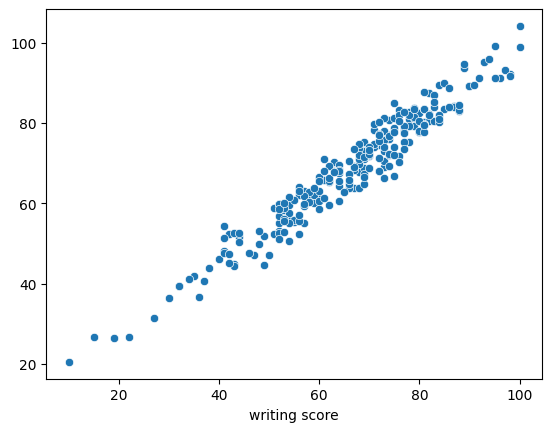

In [92]:
Model = LinearRegression()
Model.fit(X_train,y_train)
pred = Model.predict(X_test)

sns.scatterplot(x=y_test,y=pred)



<Axes: xlabel='writing score'>

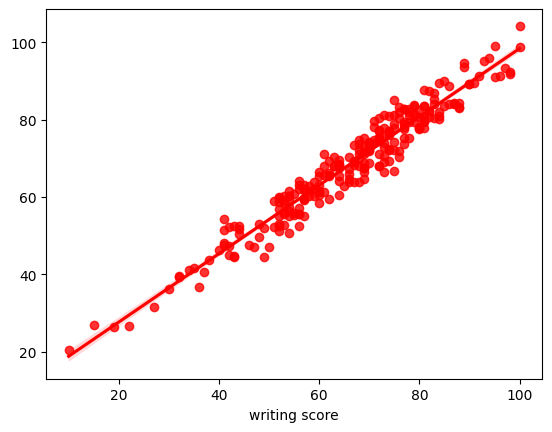

In [97]:
sns.regplot(x=y_test,y=pred,color='r')

In [98]:
residuals = y_test - pred

Text(0, 0.5, 'Residuals')

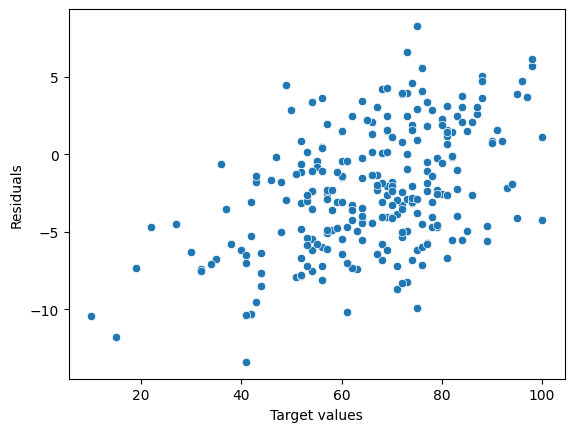

In [107]:
sns.scatterplot(x= y_test,y = residuals)
plt.xlabel('Target values')
plt.ylabel('Residuals')
